# Introduction to Geopandas

In [1]:
# Change working directory
import os
os.chdir(r'D:\Programs\Python\Jupiter notebook')
os.getcwd()

'D:\\Programs\\Python\\Jupiter notebook'

In [1]:
# Import modules

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import shapely as shp


# Ploting Shapefiles

## *1.Plot Class A roads in Kenya* 

In [2]:
# Read a shapefile as geodataframe and read features 
gdf = gpd.read_file(r"D:\Programs\Python\Jupiter notebook\Data\CLASS A.shp")

gdf.head()

,CLASS_C,geometry
0,A109,"LINESTRING (39.00070 -3.70078, 38.95825 -3.671..."
1,A23,"LINESTRING (37.62485 -3.37070, 37.64896 -3.383..."
2,A14,"LINESTRING (39.66811 -4.04994, 39.66438 -4.061..."
3,A109,"LINESTRING (38.99483 -3.69697, 39.00916 -3.708..."
4,A3,"LINESTRING (37.04659 -1.04362, 37.05130 -1.045..."


In [3]:
# Metadata - Attributes of data 

print('Dimensions , rows * columns -', gdf.shape)

print('Column names - ', gdf.columns)

print('Column data type -', gdf.dtypes)

print('Contains missing values - ', gdf.empty)


Dimensions , rows * columns - (11, 2)
Column names -  Index(['CLASS_C', 'geometry'], dtype='object')
Column data type - CLASS_C       object
geometry    geometry
dtype: object
Contains missing values -  False


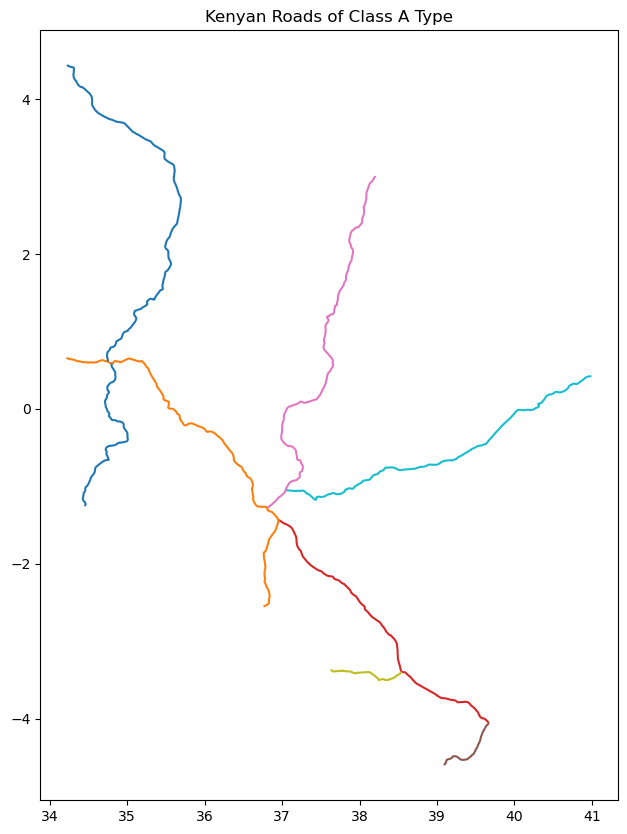

In [4]:
# Plot and display each road 

gdf.plot(column="CLASS_C",     # Colour according to features
         figsize=(10, 10))     # Size of plot
plt.title("Kenyan Roads of Class A Type")      # Add title
plt.show()


In [5]:
# Transform coordinate system to WGS 1984

gdf_new = gdf.to_crs(epsg=3857)

print("Previous coordinate system - ",gdf.crs,"\n\n New coordinate reference system - ", gdf_new.crs)


Previous coordinate system -  GEOGCS["GCS_Arc_1960",DATUM["D_Arc_1960",SPHEROID["Clarke_1880_RGS",6378249.145,293.465]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]] 

 New coordinate reference system -  epsg:3857


Text(0.5, 1.0, 'Class A Roads - WGS84 System')

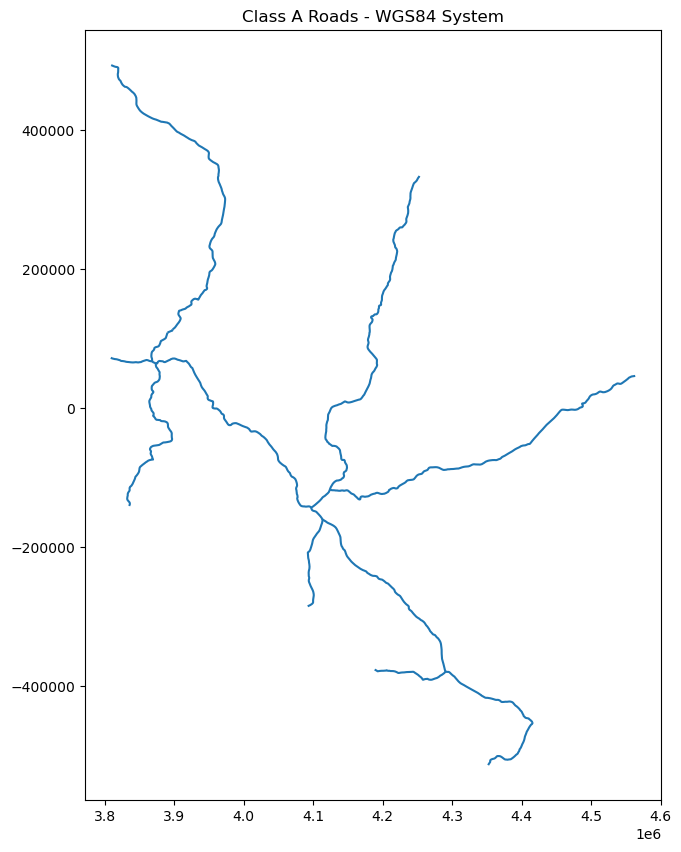

In [6]:
# Plot the shapefile with new crs

gdf_new.plot(figsize=(10, 10))
plt.title('Class A Roads - WGS84 System')


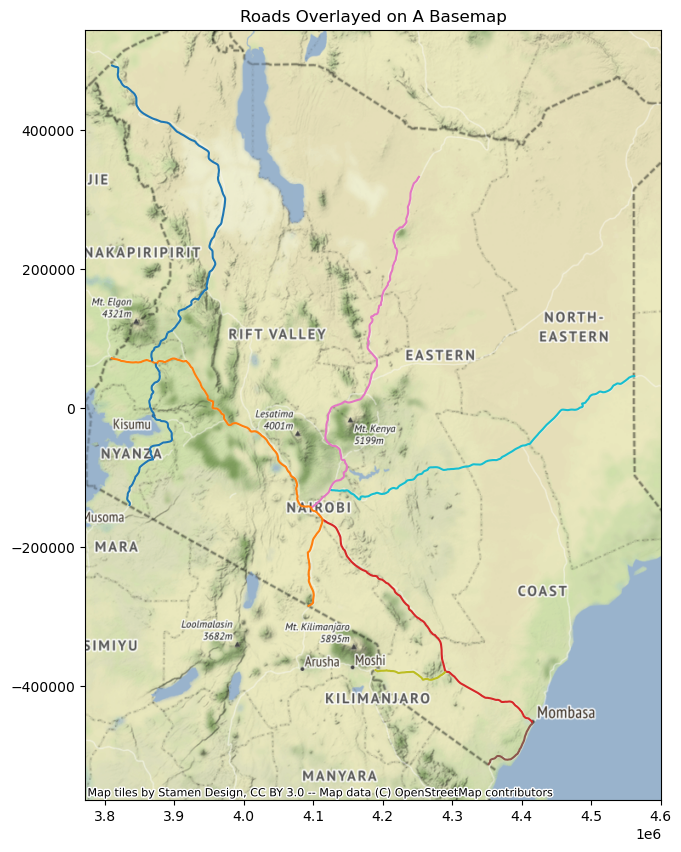

In [7]:
# Add base map

ctx.add_basemap(gdf_new.plot(figsize=(10, 10), column="CLASS_C"))
plt.title("Roads Overlayed on A Basemap")
plt.show()


# *2. Plot Former Provinces in Kenya* 

In [8]:
# Read provinces shapefile by creating a geopandas geodataframe

prov = gpd.read_file(r"D:\Programs\Python\Jupiter notebook\Data\provinces.shp")

# Features of the geodataframe

print(prov.shape, "\n", prov.head())

(8, 3) 
       FIRST_FIRS  COUNT                                           geometry
0        NAIROBI      1  POLYGON ((36.69444 -1.25622, 36.69542 -1.25609...
1          COAST      7  MULTIPOLYGON (((39.61808 -3.94914, 39.61830 -3...
2  NORTH EASTERN      3  POLYGON ((40.97104 0.45897, 40.97081 0.39238, ...
3        WESTERN      8  POLYGON ((35.11957 0.83957, 35.11972 0.83924, ...
4         NYANZA     12  MULTIPOLYGON (((34.45863 -0.21394, 34.45825 -0...


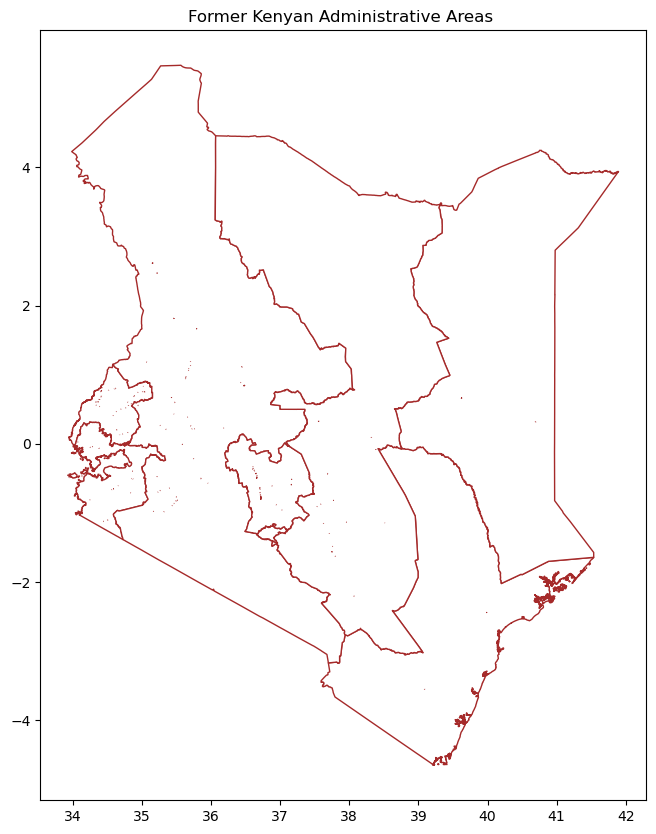

In [9]:
# Plot the geodataframe
# Parameters inside plot include : color - for polygons, cmap - palletes

prov.plot(figsize=(10, 10),
          color = "white",       # Polygon colour
          edgecolor = "brown")   # Border colours
plt.title('Former Kenyan Administrative Areas ')
plt.show()


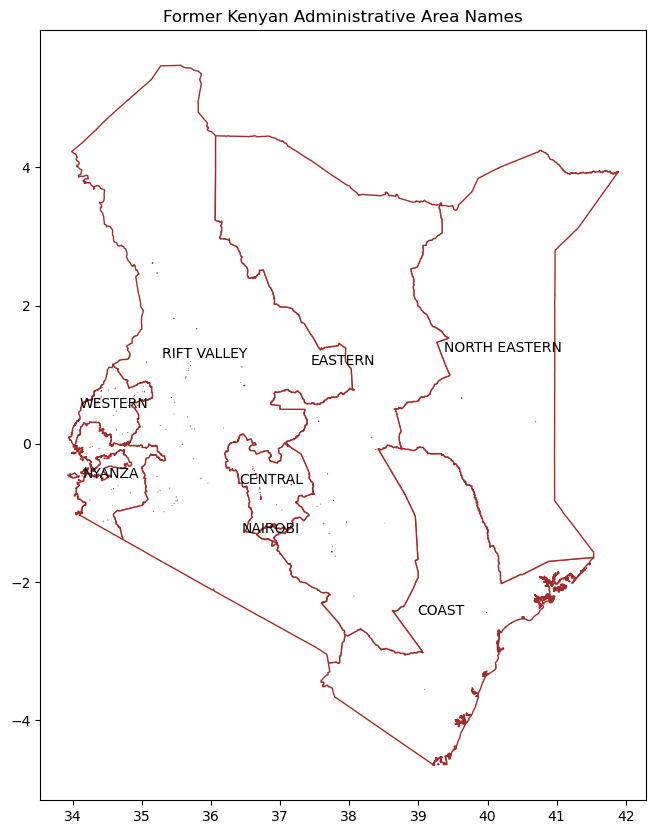

In [10]:
# Adding annotations 

ax = prov.plot(figsize=(10, 10), color = "white", edgecolor = "brown")
prov.apply(lambda x: ax.annotate(text=x['FIRST_FIRS'],     # Name according to this column, it contains names
                                 xy=x.geometry.centroid.coords[0],     # Point on the map to place names 
                                 ha='center'), axis=1);
plt.title('Former Kenyan Administrative Area Names')
plt.show()

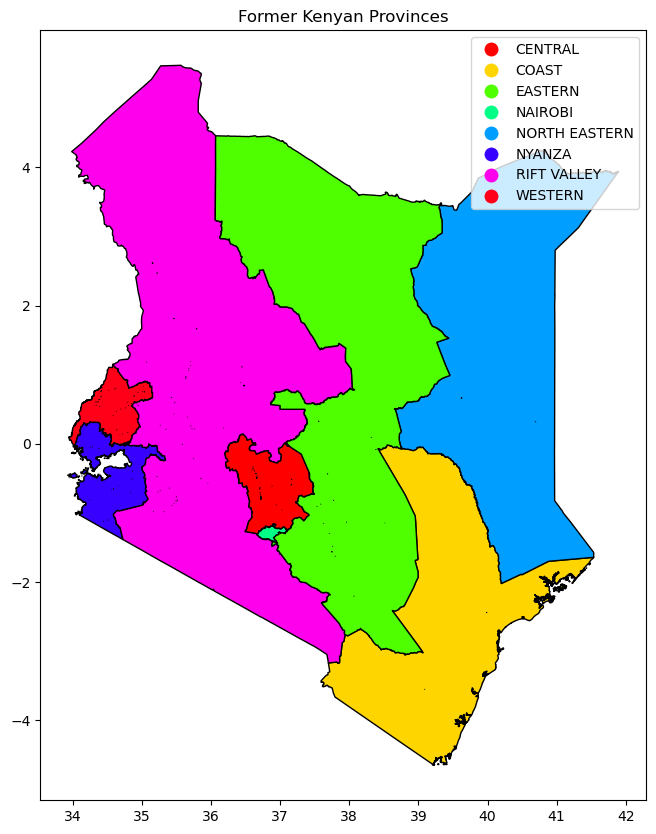

In [11]:
# Plot the map by specifying the colour based on provinces each with a unique colour

prov.plot(figsize=(10, 10),
          column="FIRST_FIRS",
          cmap="hsv",            # Colour scheme / pallets found online but not necessary
          edgecolor="black",     # Border colours
         legend=True)            # Adds a legend
plt.title("Former Kenyan Provinces")
plt.show()



## *3. Plot Area Of Interest*

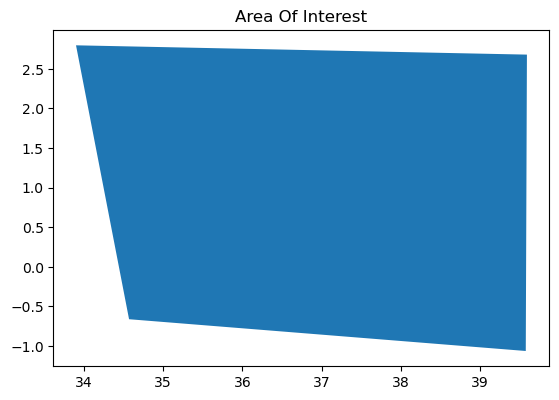

In [12]:
# Plot area of interest shapefile

aoi = gpd.read_file(r"D:\Programs\Python\Arc Py Scripts\Chapter 5 Map Scripting\.idea\AOI.shp")
aoi.plot()
plt.title("Area Of Interest")
plt.show()


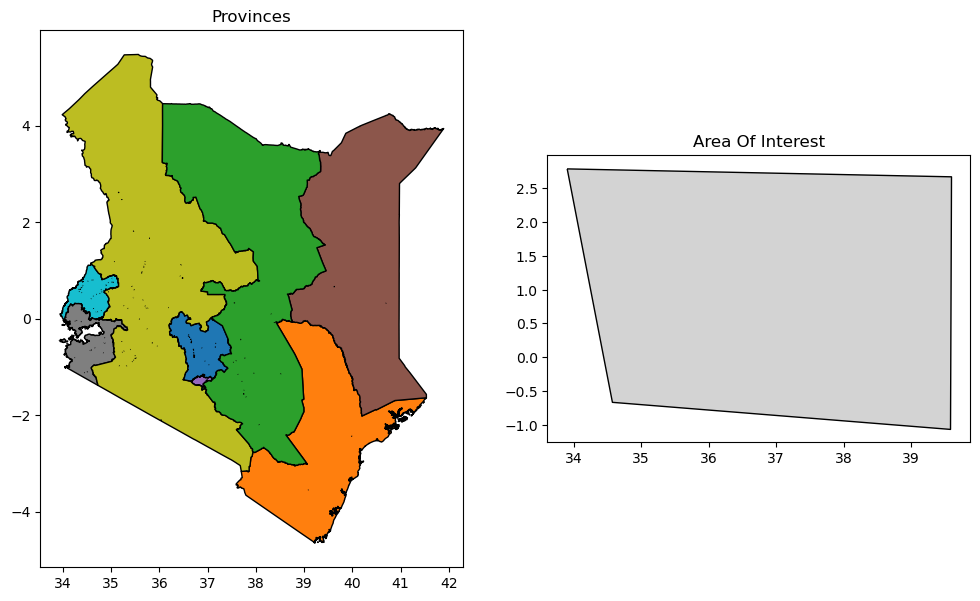

In [13]:
# Plot the two shapefiles side side, first layer to be on the bottom and others stacked above it
# Provinces will be placed on the first axis, while area of interest will be placed on the second axis
# Number of columns(ncols) places them side by side , can use rows nrows=2 to put one on top of the other

fig, (ax1, ax2) = plt.subplots(ncols=2,            
                               figsize=(12, 12))   # Plot size
prov.plot(ax=ax1,
          column="FIRST_FIRS",
          edgecolor="black")
ax1.set_title('Provinces')
aoi.plot(ax=ax2, color='lightgrey', edgecolor="black" )
ax2.set_title('Area Of Interest')
plt.show()


## *4. Transformation*

In [14]:
# Transform provinces shapefile and area of interest to WGS84, SRID Code 3857

prov = prov.to_crs(epsg=3857)
aoi = aoi.to_crs(epsg=3857)
print("\n Coordinate reference system for province", prov.crs, "\nCoordinate reference system for area of interest ", aoi.crs)



 Coordinate reference system for province epsg:3857 
Coordinate reference system for area of interest  epsg:3857


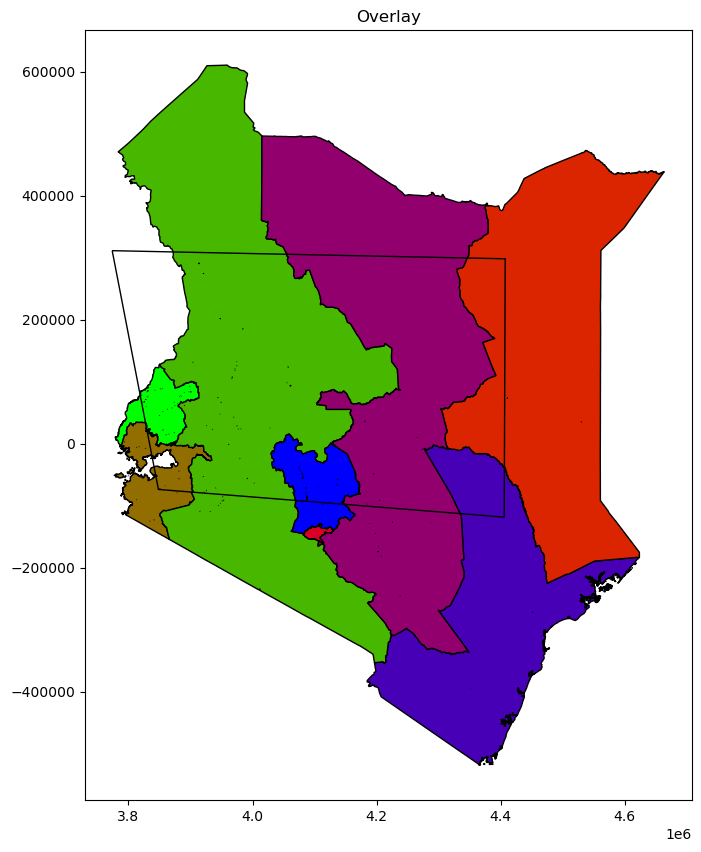

In [15]:
# Overlay both files to conveniently determine their spatial position
# Overlayed area of interest made hollow to make its limits visible 

fig, ax = plt.subplots(figsize=(10, 10))
prov.plot(ax=ax, column="FIRST_FIRS", edgecolor="black", cmap="brg")
aoi.plot(ax=ax, color='None', edgecolor="black")
plt.title("Overlay")
plt.show()

In [16]:
# Add a point shapefile of forest reserves and check its coordinate reference system

forests = gpd.read_file(r"D:\GIS DATA\Kenya Gis Data\forest reserves.shp")
print(forests.crs)
forests = forests.to_crs(epsg=3857)
print('\n New coordinate reference system ',forests.crs) 


GEOGCS["GCS_Arc_1960",DATUM["D_Arc_1960",SPHEROID["Clarke_1880_RGS",6378249.145,293.465]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]

 New coordinate reference system  epsg:3857


In [17]:
# View the first 20 forest data

forests.head(20)


,AREANAME,SIZE,DESIGNATE,geometry
0,Muruai,717,Forest Reserve,POINT (4057687.193 -11431.970)
1,Maatha,632,Forest Reserve,POINT (4239509.001 -18856.326)
2,Ntugi,1386,Forest Reserve,POINT (4220962.466 -22562.950)
3,Ndere Island,420,National Park,POINT (3848034.871 -24421.851)
4,Kisumu Impala,34,Game Sanctuary,POINT (3868440.152 -24421.850)
5,Kirima,512,Forest Reserve,POINT (4061394.039 -24421.839)
6,West Molo,277,Forest Reserve,POINT (3976055.055 -28128.481)
7,Western Mau,22748,Forest Reserve,POINT (3961204.739 -29987.370)
8,Kiganjo,172,Forest Reserve,POINT (4118914.049 -42966.255)
9,Muringato Nursery,24,Forest Reserve,POINT (4111488.894 -44825.167)


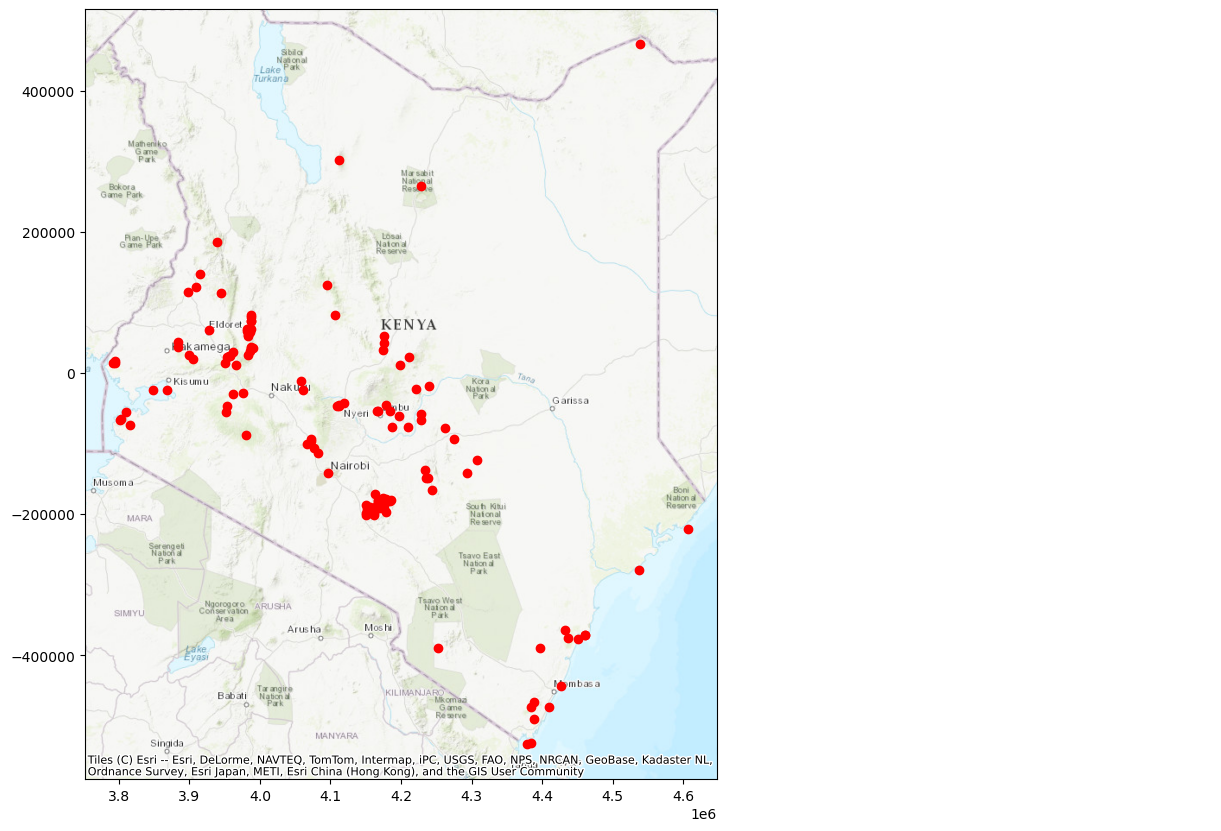

In [18]:
# Lets add a base map to forest data but with a different type of tile map
# More contextily providers can be found here : https://contextily.readthedocs.io/en/latest/intro_guide.html#Providers

ctx.add_basemap(forests.plot(color='red',                   # Feature Colour
                             figsize=(10, 10)),             # Plot size
                source=ctx.providers.Esri.WorldTopoMap)     # Basemap type


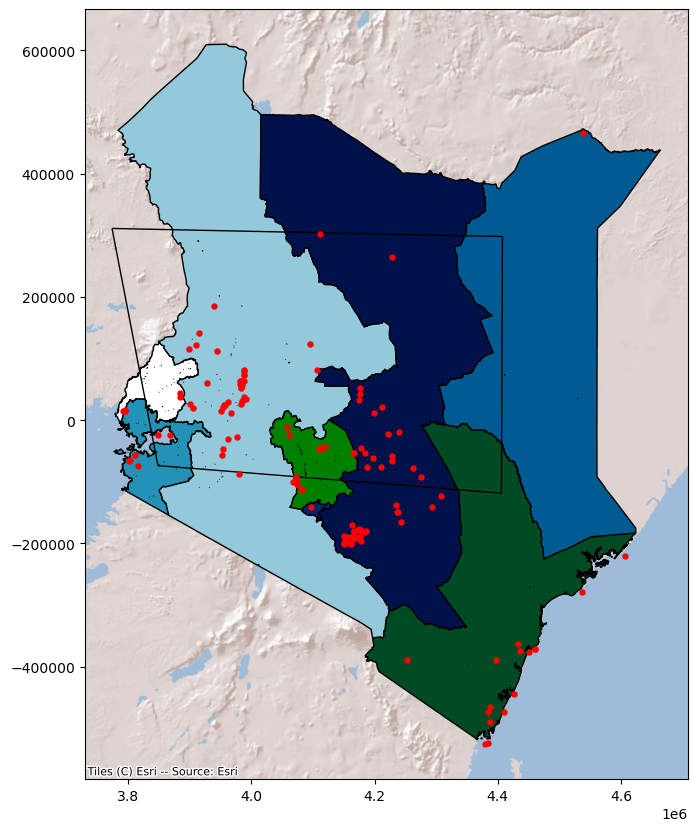

In [19]:
# Lets overlay former provinces, our area of interest, forests and a basemap  

fig, ax = plt.subplots(figsize=(10, 10))
prov.plot(ax=ax, column="FIRST_FIRS", edgecolor="black", cmap="ocean")   
aoi.plot(ax=ax, color="none", edgecolor="black")
forests.plot(ax=ax,
         color="red",      # Point feature colour
         markersize=13)    # Point size
ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldShadedRelief)
plt.show()


 # Geoprocessing tasks


## 1. Intersection

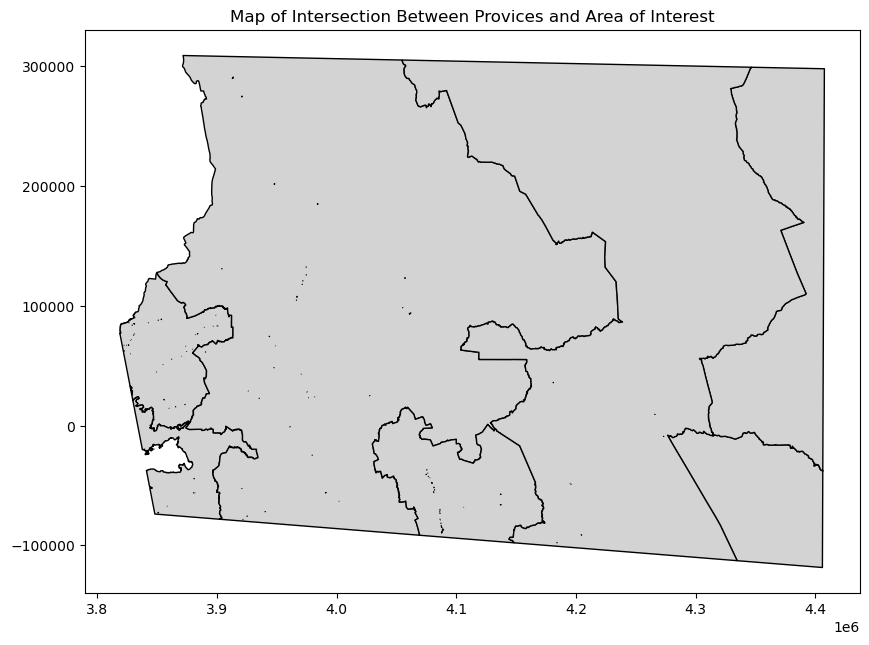

In [20]:
# Plot a map of intersection between provinces and area of interest

prov_aoi_intersect = gpd.overlay(prov,           # First feature
                                 aoi,            # Second feature
                                 how="intersection")       # Type of overlay
prov_aoi_intersect.plot(figsize=(10, 10), edgecolor="black", color="lightgrey")
plt.title('Map of Intersection Between Provices and Area of Interest')
plt.show()


In [21]:
# View dataframe

prov_aoi_intersect.head(10)


,FIRST_FIRS,COUNT,Id,geometry
0,COAST,7,0,"POLYGON ((4333768.349 -111013.066, 4333042.051..."
1,NORTH EASTERN,3,0,"POLYGON ((4406128.345 -37992.853, 4406122.787 ..."
2,WESTERN,8,0,"POLYGON ((3909598.027 93117.478, 3909623.939 9..."
3,NYANZA,12,0,"MULTIPOLYGON (((3849302.496 -16032.058, 384923..."
4,RIFT VALLEY,18,0,"POLYGON ((3902088.108 -78128.131, 3902150.523 ..."
5,CENTRAL,7,0,"POLYGON ((4047191.156 -42362.609, 4044838.209 ..."
6,EASTERN,13,0,"POLYGON ((4165929.497 -46879.017, 4153033.835 ..."


## 2. Determine Area Of Intersected Region

In [26]:
# Area in square meters

print('Area in meters sq - \n', prov_aoi_intersect.area)


Area in meters sq - 
 0    9.973493e+09
1    1.896987e+10
2    6.918630e+09
3    4.302315e+09
4    9.482662e+10
5    9.805904e+09
6    7.396010e+10
dtype: float64


In [27]:
# Area in square kilometers

print('Area in km sq - \n', prov_aoi_intersect.area / 1000000)

Area in km sq - 
 0     9973.493242
1    18969.866682
2     6918.629768
3     4302.315409
4    94826.623019
5     9805.904291
6    73960.096495
dtype: float64
